## Домашнее задание

### 1. Выберите наборы данных. которые можно интерпретировать, как временные ряды:

    а) зависимость цены на недвижимость в конкретном регионе от времени,
    
    б) скорость полета самолета при перелете из аэропорта А в аэропорт В,
    
    в) количество отказов компьютера,
    
    г) число обращений в поликлинику по району,
    
    д) координаты автобуса при движении по маршруту,
    
    е) координаты фигуры нарушителя в файле видеофиксации охранной системы.

### Ответ

а, б, д, е

### 2. Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('DUQ_hourly.csv', index_col=[0], parse_dates=[0])

Отсортируем данные по индексу

In [3]:
data = data.sort_index()

Удалим дубликаты

In [4]:
data.shape

(119068, 1)

In [5]:
#data.shape

In [6]:
#data

In [7]:
data.head()

,DUQ_MW
Datetime,
2005-01-01 01:00:00,1364.0
2005-01-01 02:00:00,1273.0
2005-01-01 03:00:00,1218.0
2005-01-01 04:00:00,1170.0
2005-01-01 05:00:00,1166.0


In [8]:
data.shape

(119068, 1)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-01-01 01:00:00 to 2018-08-03 00:00:00
Data columns (total 1 columns):
DUQ_MW    119068 non-null float64
dtypes: float64(1)
memory usage: 1.8 MB


In [10]:
data.describe()

,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


Поскольку данные лежат в диапазоне от 1014МВт до 3054, то очевидно, что точность представления float64 избыточна. Перейдем к целым. Это позволит сократить объем занимаемой памяти.

In [11]:
# Теперь целые
data['DUQ_MW'] = data['DUQ_MW'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-01-01 01:00:00 to 2018-08-03 00:00:00
Data columns (total 1 columns):
DUQ_MW    119068 non-null int32
dtypes: int32(1)
memory usage: 1.4 MB


In [12]:
# проверим пропуски
data['DUQ_MW'].isnull().sum()

0

Пропусков нет

Text(0, 0.5, 'МВт')

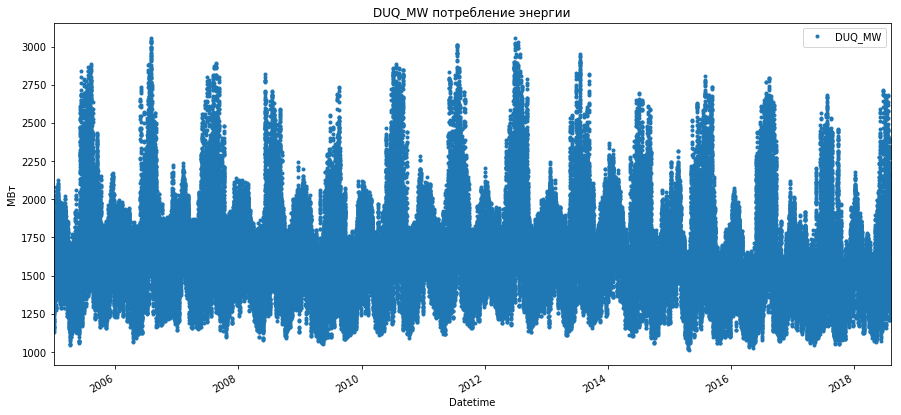

In [13]:
data.plot( style = '.', figsize = ( 15, 7 ), title = 'DUQ_MW потребление энергии' )
plt.ylabel ( 'МВт' )

- Основные статистики показали, что пропусков нет
- Визуальный анализ показывает что:
    - Предъявленные данные имеют циклы

In [14]:
import pandas_profiling

In [15]:
#pandas_profiling.ProfileReport(data)

Добавим индекс как отдельную колонку. 

In [16]:
data['date'] = data.index
data.head()

,DUQ_MW,date
Datetime,,
2005-01-01 01:00:00,1364,2005-01-01 01:00:00
2005-01-01 02:00:00,1273,2005-01-01 02:00:00
2005-01-01 03:00:00,1218,2005-01-01 03:00:00
2005-01-01 04:00:00,1170,2005-01-01 04:00:00
2005-01-01 05:00:00,1166,2005-01-01 05:00:00


### Удаление строк-дубликатов

In [17]:
data.shape

(119068, 2)

In [18]:
data = data.drop_duplicates()

In [19]:
data.shape

(119068, 2)

### Поиск индексов-дубликатов

In [20]:
data.shape[0] == data['date'].nunique()

False

In [21]:
ut = data['date'].unique()
print('число уникальных значений:   ',ut.shape[0],' : число наблюдений : ', data.shape[0])

число уникальных значений:    119064  : число наблюдений :  119068


In [22]:
count_data = data['date'].value_counts()
count_data.head(6)

2017-11-05 02:00:00    2
2014-11-02 02:00:00    2
2015-11-01 02:00:00    2
2016-11-06 02:00:00    2
2007-07-15 10:00:00    1
2012-02-07 10:00:00    1
Name: date, dtype: int64

Видно, что 4 года подряд в начале ноября вносили данные за день 2 раза. Это, скорее всего, переход на зимнее время и тогда, в марте-апреле должен быть пропуск. Избавимся от дублирования.

In [23]:
count_data.iloc[:4]

2017-11-05 02:00:00    2
2014-11-02 02:00:00    2
2015-11-01 02:00:00    2
2016-11-06 02:00:00    2
Name: date, dtype: int64

In [24]:
data.loc[count_data.iloc[:4].index]

,DUQ_MW,date
Datetime,,
2017-11-05 02:00:00,1131,2017-11-05 02:00:00
2017-11-05 02:00:00,1105,2017-11-05 02:00:00
2014-11-02 02:00:00,1272,2014-11-02 02:00:00
2014-11-02 02:00:00,1240,2014-11-02 02:00:00
2015-11-01 02:00:00,1113,2015-11-01 02:00:00
2015-11-01 02:00:00,1138,2015-11-01 02:00:00
2016-11-06 02:00:00,1121,2016-11-06 02:00:00
2016-11-06 02:00:00,1107,2016-11-06 02:00:00


In [25]:
df = data.loc[count_data.iloc[:4].index]

In [26]:
df_ = df.groupby('date').mean()

In [27]:
df_['date'] = df_.index

In [28]:
data.drop(count_data.iloc[:4].index, inplace=True)

In [29]:
data

,DUQ_MW,date
Datetime,,
2005-01-01 01:00:00,1364,2005-01-01 01:00:00
2005-01-01 02:00:00,1273,2005-01-01 02:00:00
2005-01-01 03:00:00,1218,2005-01-01 03:00:00
2005-01-01 04:00:00,1170,2005-01-01 04:00:00
2005-01-01 05:00:00,1166,2005-01-01 05:00:00
...,...,...
2018-08-02 20:00:00,1966,2018-08-02 20:00:00
2018-08-02 21:00:00,1944,2018-08-02 21:00:00
2018-08-02 22:00:00,1901,2018-08-02 22:00:00


In [30]:
data = data.append(df_,sort = False)

In [31]:
data

,DUQ_MW,date
2005-01-01 01:00:00,1364.0,2005-01-01 01:00:00
2005-01-01 02:00:00,1273.0,2005-01-01 02:00:00
2005-01-01 03:00:00,1218.0,2005-01-01 03:00:00
2005-01-01 04:00:00,1170.0,2005-01-01 04:00:00
2005-01-01 05:00:00,1166.0,2005-01-01 05:00:00
...,...,...
2018-08-03 00:00:00,1656.0,2018-08-03 00:00:00
2014-11-02 02:00:00,1256.0,2014-11-02 02:00:00
2015-11-01 02:00:00,1125.5,2015-11-01 02:00:00
2016-11-06 02:00:00,1114.0,2016-11-06 02:00:00


In [32]:
count_data = data['date'].value_counts()
count_data.head(6)

2010-07-31 10:00:00    1
2017-03-11 00:00:00    1
2015-01-02 20:00:00    1
2006-12-27 21:00:00    1
2011-07-22 21:00:00    1
2016-02-14 21:00:00    1
Name: date, dtype: int64

Теперь все значения уникальны

In [33]:
ut = data['date'].unique()
print('число уникальных значений:   ',ut.shape[0],' : число наблюдений : ', data.shape[0])

число уникальных значений:    119064  : число наблюдений :  119064


In [34]:
data = data.sort_index()

### Поиск пропущенных значений

Проверим март-апрель 2015 года

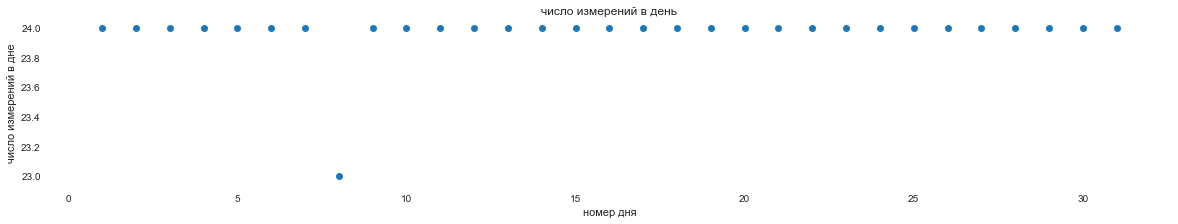

In [35]:
day_H = data['2015-03-01 00:00:00':'2015-03-31 23:00:00'].index.day

plt.figure(figsize=(20,3))
plt.plot(day_H.value_counts().index, day_H.value_counts().values ,'o')

plt.xlabel('номер дня')
plt.ylabel('число измерений в дне')
plt.title('число измерений в день')
plt.show()

Видим, что один из дней марта имеет меньше измерений, чем остальные. Определим номер этого дня используя подсчет числа измерений по дням и сравнение этой цифры с идеальным значением 24.

In [36]:
Day_count = day_H.value_counts() 
Day_count[Day_count != 24]

8    23
dtype: int64

In [37]:
data['2015-03-08 01:00:00':'2015-03-08 06:00:00'].index

DatetimeIndex(['2015-03-08 01:00:00', '2015-03-08 02:00:00',
               '2015-03-08 04:00:00', '2015-03-08 05:00:00',
               '2015-03-08 06:00:00'],
              dtype='datetime64[ns]', freq=None)

После 2-го часа сразу наступил 4-й

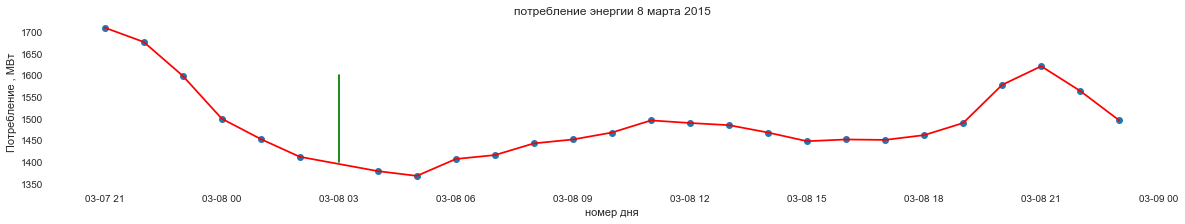

In [38]:
plt.figure(figsize=(20,3))
plt.plot(data['2015-03-07 21:00:00':'2015-03-8 23:00:00'].index,data['2015-03-07 21:00:00':'2015-03-08 23:00:00']['DUQ_MW'].values, 'o')
plt.plot(data['2015-03-07 21:00:00':'2015-03-8 23:00:00'].index,data['2015-03-07 21:00:00':'2015-03-08 23:00:00']['DUQ_MW'].values, 'r')
line_ = pd.to_datetime(pd.Series(['2015-03-08 03:00:00', '2015-03-08 03:00:00']))
plt.plot(line_,np.array([1400, 1600]),'g')
plt.xlabel('номер дня')
plt.ylabel('Потребление , МВт')
plt.title('потребление энергии 8 марта 2015')

plt.show()

In [39]:
data['2015-03-07 21:00:00':'2015-03-08 23:00:00']['DUQ_MW'].values

array([1709., 1676., 1598., 1499., 1452., 1411., 1378., 1367., 1406.,
       1415., 1442., 1451., 1467., 1495., 1489., 1484., 1467., 1447.,
       1451., 1450., 1461., 1489., 1577., 1620., 1563., 1495.])

Мы угадали одно пропущенное значение из множества возможных. Найдем все пропущенные индексы, исходя из общего количества индексов, находящихся между максимальным и минимальным

### Найдем все пропущенные значения

In [40]:
data.shape

(119064, 2)

In [41]:
data.index[0]

Timestamp('2005-01-01 01:00:00')

In [42]:
data.index[-1]

Timestamp('2018-08-03 00:00:00')

In [43]:
new_index = pd.date_range('2005-01-01 01:00:00', '2018-08-03 00:00:00', freq="H")

Получим все значения индекса, которые должны быть в промежутке между 2005-01-01 01:00:00 и 2018-08-03 00:00:00

In [44]:
new_index

DatetimeIndex(['2005-01-01 01:00:00', '2005-01-01 02:00:00',
               '2005-01-01 03:00:00', '2005-01-01 04:00:00',
               '2005-01-01 05:00:00', '2005-01-01 06:00:00',
               '2005-01-01 07:00:00', '2005-01-01 08:00:00',
               '2005-01-01 09:00:00', '2005-01-01 10:00:00',
               ...
               '2018-08-02 15:00:00', '2018-08-02 16:00:00',
               '2018-08-02 17:00:00', '2018-08-02 18:00:00',
               '2018-08-02 19:00:00', '2018-08-02 20:00:00',
               '2018-08-02 21:00:00', '2018-08-02 22:00:00',
               '2018-08-02 23:00:00', '2018-08-03 00:00:00'],
              dtype='datetime64[ns]', length=119088, freq='H')

In [45]:
for d in new_index:
    if d not in data['date']:
        print(d)

2005-04-03 03:00:00
2005-10-30 02:00:00
2006-04-02 03:00:00
2006-10-29 02:00:00
2007-03-11 03:00:00
2007-11-04 02:00:00
2008-03-09 03:00:00
2008-11-02 02:00:00
2009-03-08 03:00:00
2009-11-01 02:00:00
2010-03-14 03:00:00
2010-11-07 02:00:00
2010-12-10 00:00:00
2011-03-13 03:00:00
2011-11-06 02:00:00
2012-03-11 03:00:00
2012-11-04 02:00:00
2013-03-10 03:00:00
2013-11-03 02:00:00
2014-03-09 03:00:00
2015-03-08 03:00:00
2016-03-13 03:00:00
2017-03-12 03:00:00
2018-03-11 03:00:00


In [46]:
missed_index = []

In [47]:
for d in new_index:
    if d not in data['date']:
        missed_index.append(d)

In [48]:
len(missed_index)

24

Итого, пропущено 24 индекса. Добавим их в data, а значения DUQ_MW возьмем как среднее арифметическое от соседних элементов

In [49]:
new_data = pd.DataFrame(np.zeros(len(missed_index)), index = missed_index, columns = ['DUQ_MW'])

In [50]:
from datetime import timedelta
one_hour = timedelta(hours=1)

In [51]:
new_data.head()

,DUQ_MW
2005-04-03 03:00:00,0.0
2005-10-30 02:00:00,0.0
2006-04-02 03:00:00,0.0
2006-10-29 02:00:00,0.0
2007-03-11 03:00:00,0.0


In [52]:
new_data['index+hour'] = new_data.index + one_hour

In [53]:
new_data['index-hour'] = new_data.index - one_hour

In [54]:
new_data.head()

,DUQ_MW,index+hour,index-hour
2005-04-03 03:00:00,0.0,2005-04-03 04:00:00,2005-04-03 02:00:00
2005-10-30 02:00:00,0.0,2005-10-30 03:00:00,2005-10-30 01:00:00
2006-04-02 03:00:00,0.0,2006-04-02 04:00:00,2006-04-02 02:00:00
2006-10-29 02:00:00,0.0,2006-10-29 03:00:00,2006-10-29 01:00:00
2007-03-11 03:00:00,0.0,2007-03-11 04:00:00,2007-03-11 02:00:00


In [55]:
new_data.shape

(24, 3)

In [56]:
data.loc[new_data['index-hour']]['DUQ_MW']

2005-04-03 02:00:00    1310.0
2005-10-30 01:00:00    1338.0
2006-04-02 02:00:00    1221.0
2006-10-29 01:00:00    1411.0
2007-03-11 02:00:00    1373.0
2007-11-04 01:00:00    1309.0
2008-03-09 02:00:00    1501.0
2008-11-02 01:00:00    1263.0
2009-03-08 02:00:00    1137.0
2009-11-01 01:00:00    1255.0
2010-03-14 02:00:00    1235.0
2010-11-07 01:00:00    1417.0
2010-12-09 23:00:00    1838.0
2011-03-13 02:00:00    1301.0
2011-11-06 01:00:00    1384.0
2012-03-11 02:00:00    1389.0
2012-11-04 01:00:00    1390.0
2013-03-10 02:00:00    1347.0
2013-11-03 01:00:00    1335.0
2014-03-09 02:00:00    1429.0
2015-03-08 02:00:00    1411.0
2016-03-13 02:00:00    1124.0
2017-03-12 02:00:00    1464.0
2018-03-11 02:00:00    1346.0
Name: DUQ_MW, dtype: float64

In [57]:
# Получим пропущенные значения как среднее арифметическое от соседних примеров

In [58]:
new_data['DUQ_MW'] = (data.loc[new_data['index-hour']]['DUQ_MW'].values + 
                      data.loc[new_data['index+hour']]['DUQ_MW'].values)/2

In [59]:
new_data.head()

,DUQ_MW,index+hour,index-hour
2005-04-03 03:00:00,1286.5,2005-04-03 04:00:00,2005-04-03 02:00:00
2005-10-30 02:00:00,1299.5,2005-10-30 03:00:00,2005-10-30 01:00:00
2006-04-02 03:00:00,1201.5,2006-04-02 04:00:00,2006-04-02 02:00:00
2006-10-29 02:00:00,1355.5,2006-10-29 03:00:00,2006-10-29 01:00:00
2007-03-11 03:00:00,1385.5,2007-03-11 04:00:00,2007-03-11 02:00:00


In [60]:
new_data['date'] = new_data.index

In [61]:
new_data.drop(columns = ['index+hour', 'index-hour'], axis = 1, inplace = True)

In [62]:
new_data.head()

,DUQ_MW,date
2005-04-03 03:00:00,1286.5,2005-04-03 03:00:00
2005-10-30 02:00:00,1299.5,2005-10-30 02:00:00
2006-04-02 03:00:00,1201.5,2006-04-02 03:00:00
2006-10-29 02:00:00,1355.5,2006-10-29 02:00:00
2007-03-11 03:00:00,1385.5,2007-03-11 03:00:00


Добавим полученный датафрейм к исходному

In [63]:
data = data.append(new_data,sort = False)

In [64]:
data.shape

(119088, 2)

In [65]:
data = data.sort_index()

Снова проверим на наличие дубликатов

In [66]:
new_data

,DUQ_MW,date
2005-04-03 03:00:00,1286.5,2005-04-03 03:00:00
2005-10-30 02:00:00,1299.5,2005-10-30 02:00:00
2006-04-02 03:00:00,1201.5,2006-04-02 03:00:00
2006-10-29 02:00:00,1355.5,2006-10-29 02:00:00
2007-03-11 03:00:00,1385.5,2007-03-11 03:00:00
2007-11-04 02:00:00,1272.5,2007-11-04 02:00:00
2008-03-09 03:00:00,1491.0,2008-03-09 03:00:00
2008-11-02 02:00:00,1214.5,2008-11-02 02:00:00
2009-03-08 03:00:00,1127.0,2009-03-08 03:00:00
2009-11-01 02:00:00,1226.5,2009-11-01 02:00:00


In [67]:
data.shape[0] == data['date'].nunique()

True

In [68]:
ut = data['date'].unique()
print('число уникальных значений:   ',ut.shape[0],' : число наблюдений : ', data.shape[0])

число уникальных значений:    119088  : число наблюдений :  119088


In [69]:
(data.index == data['date']).all()

True

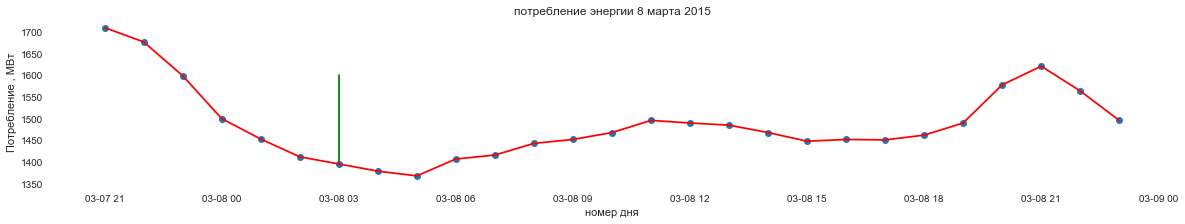

In [70]:
plt.figure(figsize=(20,3))
plt.plot(data['2015-03-07 21:00:00':'2015-03-8 23:00:00'].index,data['2015-03-07 21:00:00':'2015-03-08 23:00:00']['DUQ_MW'].values, 'o')
plt.plot(data['2015-03-07 21:00:00':'2015-03-8 23:00:00'].index,data['2015-03-07 21:00:00':'2015-03-08 23:00:00']['DUQ_MW'].values, 'r')
line_ = pd.to_datetime(pd.Series(['2015-03-08 03:00:00', '2015-03-08 03:00:00']))
plt.plot(line_,np.array([1400, 1600]),'g')
plt.xlabel('номер дня')
plt.ylabel('Потребление , МВт')
plt.title('потребление энергии 8 марта 2015')

plt.show()

На графике видно, что отсутствующее значение заполнено. Проверим остальные

In [71]:
z = data.loc[missed_index]

In [72]:
z['date+H'] = z['date'] + one_hour

In [73]:
z['date-H'] = z['date'] - one_hour

In [74]:
data.loc[z['date-H']]['DUQ_MW'].values

array([1310., 1338., 1221., 1411., 1373., 1309., 1501., 1263., 1137.,
       1255., 1235., 1417., 1838., 1301., 1384., 1389., 1390., 1347.,
       1335., 1429., 1411., 1124., 1464., 1346.])

In [75]:
z['DUQ_MW+H'] = data.loc[z['date+H']]['DUQ_MW'].values

In [76]:
z['DUQ_MW-H'] = data.loc[z['date-H']]['DUQ_MW'].values

In [77]:
z['пров'] = (z['DUQ_MW+H'] + z['DUQ_MW-H'])/2

In [78]:
z.head()

,DUQ_MW,date,date+H,date-H,DUQ_MW+H,DUQ_MW-H,пров
2005-04-03 03:00:00,1286.5,2005-04-03 03:00:00,2005-04-03 04:00:00,2005-04-03 02:00:00,1263.0,1310.0,1286.5
2005-10-30 02:00:00,1299.5,2005-10-30 02:00:00,2005-10-30 03:00:00,2005-10-30 01:00:00,1261.0,1338.0,1299.5
2006-04-02 03:00:00,1201.5,2006-04-02 03:00:00,2006-04-02 04:00:00,2006-04-02 02:00:00,1182.0,1221.0,1201.5
2006-10-29 02:00:00,1355.5,2006-10-29 02:00:00,2006-10-29 03:00:00,2006-10-29 01:00:00,1300.0,1411.0,1355.5
2007-03-11 03:00:00,1385.5,2007-03-11 03:00:00,2007-03-11 04:00:00,2007-03-11 02:00:00,1398.0,1373.0,1385.5


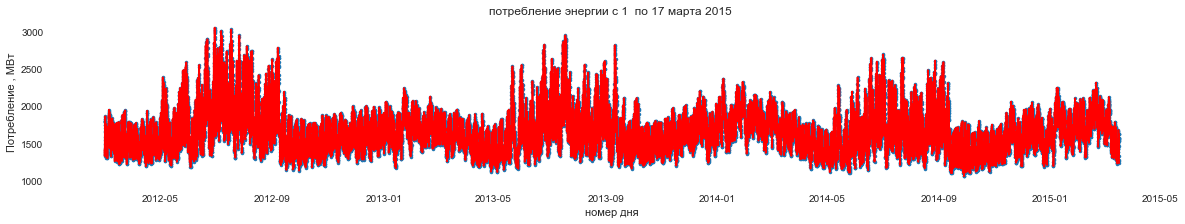

In [79]:
plt.figure(figsize=(20,3))
plt.plot(data['2012-03-01 01:00:00':'2015-03-17 03:00:00'].index,data['2012-03-01 01:00:00':'2015-03-17 03:00:00']['DUQ_MW'].values, '.')
plt.plot(data['2012-03-01 01:00:00':'2015-03-17 03:00:00'].index,data['2012-03-01 01:00:00':'2015-03-17 03:00:00']['DUQ_MW'].values, 'r')

plt.xlabel('номер дня')
plt.ylabel('Потребление , МВт')
plt.title('потребление энергии с 1  по 17 марта 2015 ')
plt.show()

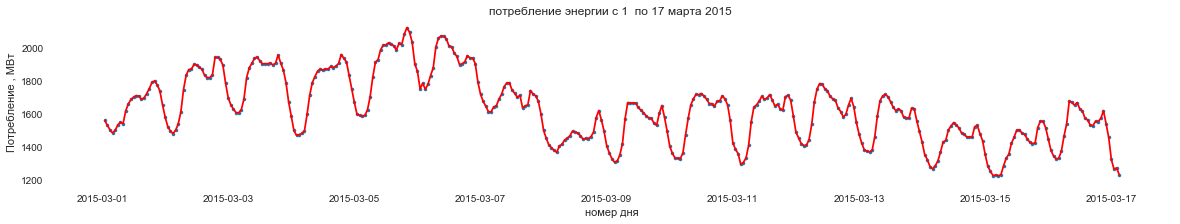

In [80]:
plt.figure(figsize=(20,3))
plt.plot(data['2015-03-01 01:00:00':'2015-03-17 03:00:00'].index,data['2015-03-01 01:00:00':'2015-03-17 03:00:00']['DUQ_MW'].values, '.')
plt.plot(data['2015-03-01 01:00:00':'2015-03-17 03:00:00'].index,data['2015-03-01 01:00:00':'2015-03-17 03:00:00']['DUQ_MW'].values, 'r')

plt.xlabel('номер дня')
plt.ylabel('Потребление , МВт')
plt.title('потребление энергии с 1  по 17 марта 2015 ')
plt.show()

Описание особенностей выборки: выбросов не обнаружено, пропуски были заполнены средними значениями соседних примеров. Зависимость имеет сезонные циклы и суточные циклы.

### 3. вариант 2) Сделайте ресемплинг COVID19 на интервалы 3 дня, неделя, 2 недели.Постройте график изменения среднего по выборке и среднего отклонения по выборке на группах для интервалах 3 дня, неделя, 2 недели (одна группа на интервале - одно значение std или mean, т.е. если было 28 деней, то 9 значений для ресемплинга на 3 дня, 4 значения при ресемплинге неделя и 2 значения при ресемплинге 2 недели )

In [81]:
COVID = pd.read_csv('covid_19_data_1.csv')
COVID.head(20)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


In [82]:
COVID.shape

(13850, 8)

In [83]:
COVID['Data']= pd.to_datetime(COVID['ObservationDate'])

In [84]:
COVID_Italy = COVID.loc[COVID['Country/Region'] == 'Italy']

In [85]:
COVID_Italy = COVID_Italy.set_index(COVID_Italy['Data'])

In [86]:
COVID_Italy.drop(columns = ['SNo', 'ObservationDate', 'Province/State', 'Country/Region', 'Data', 'Last Update'], inplace = True)

In [87]:
COVID_Italy

,Confirmed,Deaths,Recovered
Data,,,
2020-01-31,2.0,0.0,0.0
2020-02-01,2.0,0.0,0.0
2020-02-02,2.0,0.0,0.0
2020-02-03,2.0,0.0,0.0
2020-02-04,2.0,0.0,0.0
...,...,...,...
2020-04-06,132547.0,16523.0,22837.0
2020-04-07,135586.0,17127.0,24392.0
2020-04-08,139422.0,17669.0,26491.0


In [88]:
COVID_Italy.sort_index(inplace=True)

In [89]:
COVID_Italy.index

DatetimeIndex(['2020-01-31', '2020-02-01', '2020-02-02', '2020-02-03',
               '2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07',
               '2020-02-08', '2020-02-09', '2020-02-10', '2020-02-11',
               '2020-02-12', '2020-02-13', '2020-02-14', '2020-02-15',
               '2020-02-16', '2020-02-17', '2020-02-18', '2020-02-19',
               '2020-02-20', '2020-02-21', '2020-02-22', '2020-02-23',
               '2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27',
               '2020-02-28', '2020-02-29', '2020-03-01', '2020-03-02',
               '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06',
               '2020-03-07', '2020-03-08', '2020-03-09', '2020-03-10',
               '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14',
               '2020-03-15', '2020-03-16', '2020-03-17', '2020-03-18',
               '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22',
               '2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26',
      

Text(0, 0.5, '3 Days std')

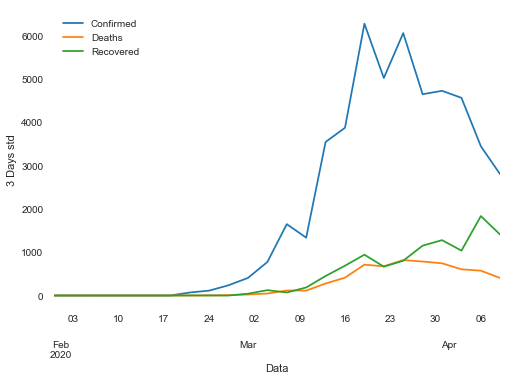

In [90]:
COVID_Italy.resample("3D").std().plot()
plt.ylabel("3 Days std")

Text(0, 0.5, '3 Days Mean')

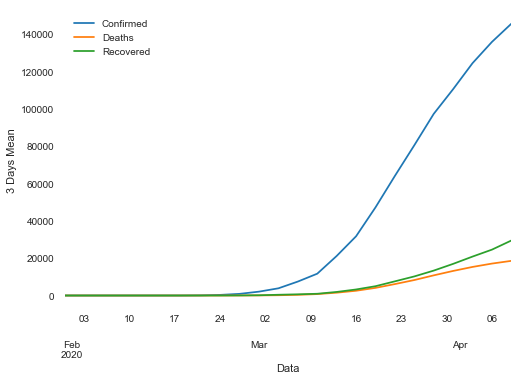

In [91]:
COVID_Italy.resample("3D").mean().plot()
plt.ylabel("3 Days Mean")

Text(0, 0.5, 'Week std')

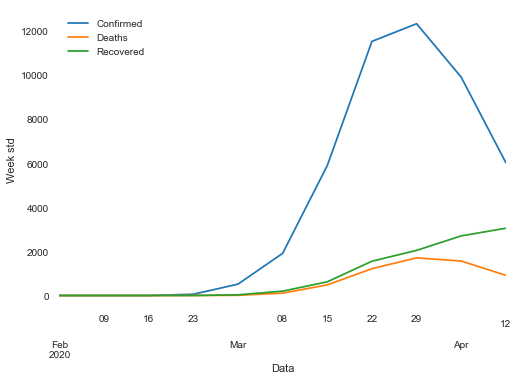

In [92]:
COVID_Italy.resample("W").std().plot()
plt.ylabel("Week std")

Text(0, 0.5, 'Week Mean')

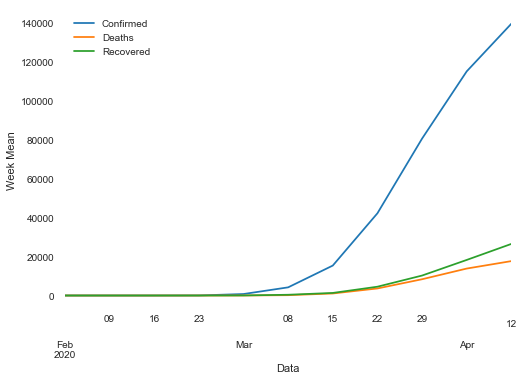

In [93]:
COVID_Italy.resample("W").mean().plot()
plt.ylabel("Week Mean")

Text(0, 0.5, 'Two Week std')

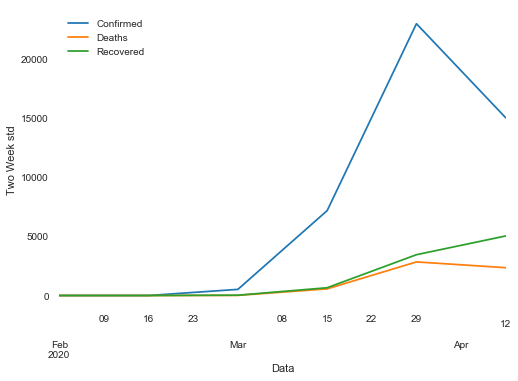

In [94]:
COVID_Italy.resample("2W").std().plot()
plt.ylabel("Two Week std")

Text(0, 0.5, 'Two Week Mean')

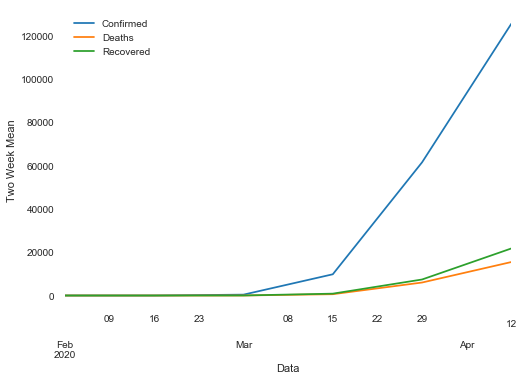

In [97]:
COVID_Italy.resample("2W").mean().plot()
plt.ylabel("Two Week Mean")

### 4. Сделайте вывод о том, как изменилось поведение данных по заболеваемости на разных графиках.

Значения std становятся больше с увеличением интервалов при ресемплинге. Значения mean практически не изменяются. В обоих случаях снижается уровень детализации.